In [21]:
using Gen

@gen function generative_function()
    theta ~ beta(1,1)
    for i in 1:10
        {i} ~ bernoulli(theta)
    end
end

DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[], false, Union{Nothing, Some{Any}}[], var"##generative_function#230", Bool[], false)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[], false, Union{Nothing, Some{Any}}[], var"##generative_function#230", Bool[], false), Trie{Any, Gen.ChoiceOrCallRecord}(Dict{Any, Gen.ChoiceOrCallRecord}(5 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 8 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 1 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 6 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 9 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 3 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 7 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 4 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 2 => Gen.ChoiceOrCallRecord{Bool}(false, -0.08620773717688568, NaN, true), 10 => Gen.ChoiceOrCallRecord{Bool}(false, -0.086207737

In [ ]:
trace = simulate(generative_function, ())
get_choices(trace)

│
├── 5 : false
│
├── 8 : false
│
├── 1 : false
│
├── 6 : false
│
├── 9 : false
│
├── 3 : false
│
├── 7 : false
│
├── 4 : false
│
├── 2 : false
│
├── 10 : false
│
└── :theta : 0.0825963674170724


In [44]:
traces = [simulate(generative_function, ()) for _ in 1:1000]
thetas = [get_choices(trace)[:theta] for trace in traces]

1000-element Vector{Float64}:
 0.6685811880782477
 0.5771068927948434
 0.7950617017659732
 0.45509609945150126
 0.23361194374887934
 0.15844321142872247
 0.5824365079148426
 0.0763425435196895
 0.9030369410721069
 0.9344427290834696
 ⋮
 0.8198970429547136
 0.01106442149913032
 0.3736810573775287
 0.31781522567745574
 0.12646651636859219
 0.818060726721195
 0.8605241897143276
 0.5214518324050181
 0.9678332372469162

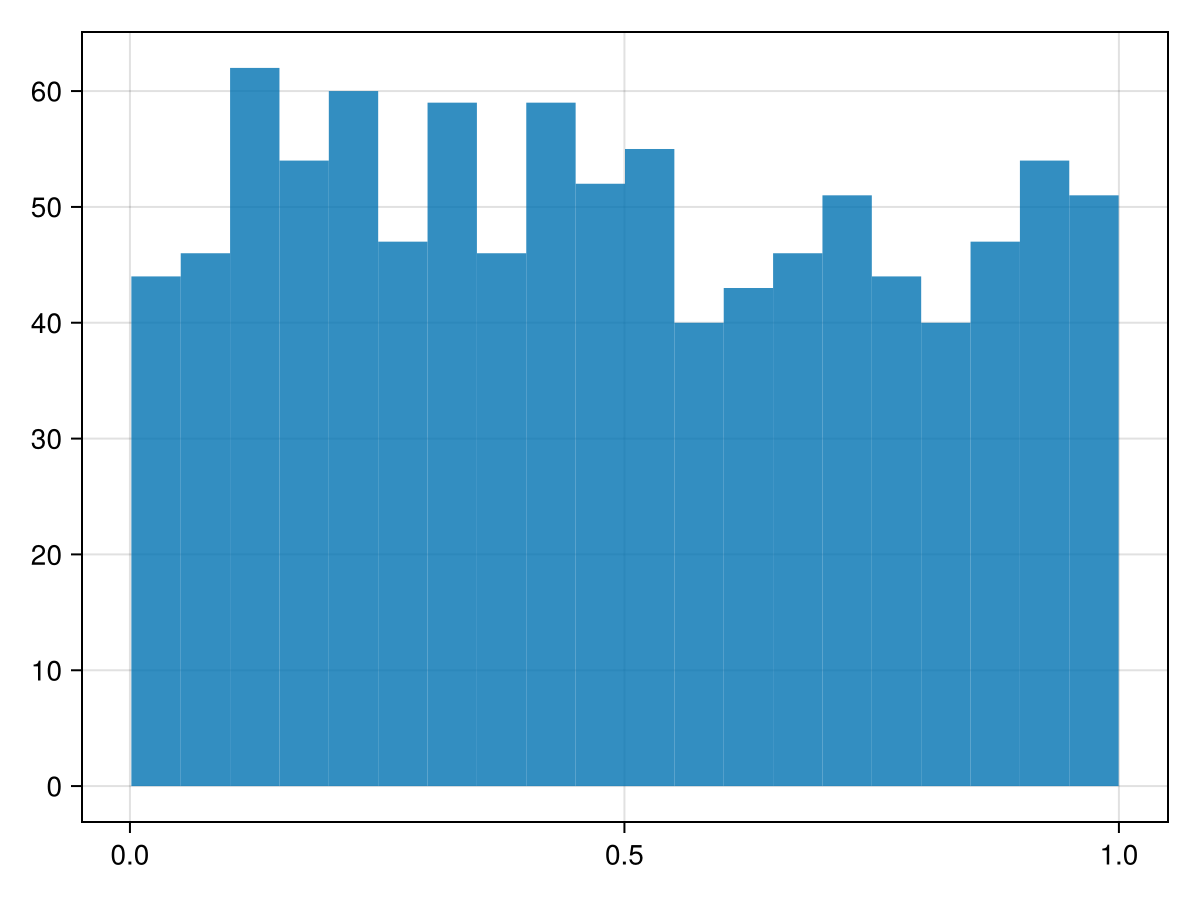

In [46]:
using CairoMakie
hist(thetas, bins=20)

In [ ]:
conditions = choicemap()
for i in 1:10
    if i < 3
        conditions[:i] = 1
    else 
        conditions[:i] = 0
    end
end